In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib
%pip install pymetis
%pip install sklearn
%pip install scikit-network

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# The starter code is short and simple, take a look!
from starter import *
import pymetis
import sklearn
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import normalized_mutual_info_score
import numpy as np

# Phase 1 - Create Inputs

In [3]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

import random

def small(G: nx.Graph):
    for i in range(100):
        for j in range(100):
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))
    
def medium(G: nx.Graph):
    already_in = []
    i = 0
    while i <= 10000:
        rand_v1 = random.randint(0, 299)
        rand_v2 = random.randint(0, 299)
        rand_v = 1000 * rand_v1 + rand_v2
        if rand_v in already_in or rand_v1 == rand_v2:
            continue
        i += 1
        already_in.append(rand_v)
        G.add_edge(rand_v1, rand_v2, weight=random.randint(1, 1000))
        
    
def large(G: nx.Graph):
    already_in = []
    i = 0
    while i <= 10000:
        rand_v1 = random.randint(0, 999)
        rand_v2 = random.randint(0, 999)
        rand_v = 1000 * rand_v1 + rand_v2
        if rand_v in already_in or rand_v1 == rand_v2:
            continue
        i += 1
        already_in.append(rand_v)
        G.add_edge(rand_v1, rand_v2, weight=random.randint(1, 1000))

In [4]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')

# Phase 2 - Implement your Solver

In [5]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']

    max_weight = max([wt for (u, v, wt) in G.edges.data('weight')])
    G_prime = nx.complete_graph(len(G.nodes))
    for u in range(len(G_prime.nodes)):
        for v in range(len(G_prime.nodes)):
            if u != v:
                if G.has_edge(u, v):
                    G_prime[u][v]['weight'] = max_weight - G[u][v]['weight']
                else:
                    G_prime[u][v]['weight'] = max_weight
    adj = nx.adjacency_matrix(G_prime)
    
    k_clusters = 4
    min_score, min_teams = float('inf'), [1]*len(G.nodes)
    while k_clusters < 20:
        clustering = SpectralClustering(n_clusters = k_clusters, assign_labels = 'discretize', affinity = 'precomputed', random_state=0).fit(adj)
        for n in range(len(clustering.labels_)):
            G.nodes[n]['team'] = int(clustering.labels_[n]) + 1
        curr_score = score(G)
        if curr_score < min_score:
            min_score = curr_score
            min_teams = clustering.labels_
        else:
            break
        k_clusters += 2
    for i in range(len(min_teams)):
        G.nodes[i]['team'] = int(min_teams[i]) + 1
        
        

/tmp/ipykernel_990/1781895608.py:15: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G_prime)


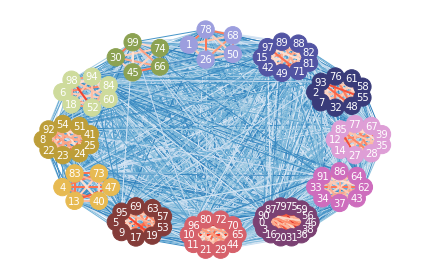

166303.4080180218

In [6]:
G = read_input('small.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

In [7]:
run(solve, 'small.in', 'small.out')

/tmp/ipykernel_990/1781895608.py:15: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G_prime)


small.in: cost 166303.4080180218


In [21]:
run_all(solve, 'medium_inputs_5', 'medium_outputs_5', overwrite = True)
tar('medium_outputs_5', overwrite = True)

  0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_990/1781895608.py:15: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G_prime)


medium_inputs_5/medium45.in: cost 668006456550498.1
medium_inputs_5/medium58.in: cost 117965773620.43042


In [22]:
tar('outputs', overwrite = True)